In [1]:

import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12


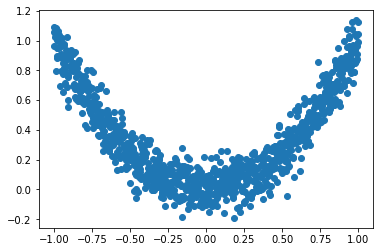

In [12]:
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))  #error 
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [13]:
torch_dataset = Data.TensorDataset(x, y)


In [14]:
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True, num_workers=2,)

In [15]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1) # output
        
    def forward(self, x):
        x = F.relu(self.hidden(x)) # activation funtion
        x = self.predict(x)           # linear output
        return x

In [16]:
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD,net_Momentum,net_RMSprop, net_Adam]

In [17]:

opt_SGD  = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
#같은 방향으로 계속 움직이는 경향이 있습니다
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR, alpha=0.9)
#과거 그라디언트의 지수 함수 적으로 감쇠 평균 유지 
opt_Adam  = torch.optim.Adam(net_Adam.parameters(),lr=LR, betas=(0.9,0.99))
optimizers = [opt_SGD, opt_Momentum,opt_RMSprop,opt_Adam]

In [18]:
loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


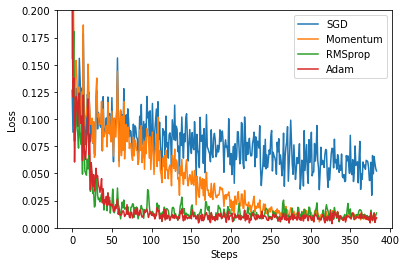

In [19]:
for epoch in range(EPOCH):
    print('Epoch:',epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net,opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data)
            
labels = ['SGD', 'Momentum','RMSprop','Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label = labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()